<a href="https://colab.research.google.com/github/Daegil2/practice/blob/main/univ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pycountry-convert
import pycountry_convert as pc

In [ ]:
import os
os.getcwd()

'c:\\promise\\univ'

In [ ]:
df_THE = pd.read_csv('THE.csv')
df_qsworld = pd.read_csv('qsworld.csv')

In [ ]:
df_THE

,Unnamed: 0,Rank,Name,Overall,Teaching,Research,Citations,Industry Income,International Outlook,Country
0,0,1,University of Oxford,95.6,91.3,99.6,98.0,68.7,96.4,United Kingdom
1,1,2,Stanford University,94.9,92.2,96.7,99.9,90.1,79.5,United States
2,2,3,Harvard University,94.8,94.4,98.8,99.4,46.8,77.7,United States
3,3,4,California Institute of Technology,94.5,92.5,96.9,97.0,92.7,83.6,United States
4,4,5,Massachusetts Institute of Technology,94.4,90.7,94.4,99.7,90.4,90.0,United States
...,...,...,...,...,...,...,...,...,...,...
1521,1521,1001+,Yuan Ze University,10.3–25.0,18.8,14.1,19.7,50.1,30.9,Taiwan
1522,1522,1001+,Yuriy Fedkovych Chernivtsi National University,10.3–25.0,17.9,7.7,5.3,33.4,22.2,Ukraine
1523,1523,1001+,Zagazig University,10.3–25.0,13.7,7.4,42.3,33.4,40.6,Egypt
1524,1524,1001+,University of Zagreb,10.3–25.0,19.5,13.2,27.2,40.3,34.3,Croatia


In [ ]:
df_THE_fix = df_THE.drop(columns =['Unnamed: 0', 'Rank', 'Overall'])
df_THE_fix.Name[42] = 'EPFL'
df_THE_fix.Name[45] = 'PSL University'

<ipython-input-173-3948784bfc78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_THE_fix.Name[42] = 'EPFL'
<ipython-input-173-3948784bfc78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_THE_fix.Name[45] = 'PSL University'


In [ ]:
df_THE_fix['Name'] = df_THE_fix['Name'].str.split('(').str[0]
name_clean = []
for x in df_THE_fix.Name:
    if x[-1] ==' ':
        x=x[:-1]
    else:
        x=x
    name_clean.append(x)

df_THE_fix['Name'] = np.array(name_clean)

In [ ]:
def missing_percentage(df):
    total= df.isnull().sum().sort_values(ascending= False)
    percent = round(df.isnull().sum().sort_values(ascending =False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_percentage(df_THE_fix)


,Total,Percent
Country,0,0.0
International Outlook,0,0.0
Industry Income,0,0.0
Citations,0,0.0
Research,0,0.0
Teaching,0,0.0
Name,0,0.0


In [ ]:
df_qsworld['Country_qsworld'] = df_qsworld['Location'].str.split(',').str[1]
df_qsworld.Country_qsworld = df_qsworld.Country_qsworld.replace(np.nan, 0)
df_qsworld = df_qsworld.drop(df_qsworld[df_qsworld.Country_qsworld == 0].index)

In [ ]:
df_qsworld

,Unnamed: 0,Rank,University,Overall Score,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Citations per Faculty,Academic Reputation,Employer Reputation,Location,Country_qsworld
0,0,1,Massachusetts Institute of Technology (MIT),100.0,91.9,100.0,100.0,99.1,100.0,100.0,"Cambridge,United States",United States
1,1,2,Stanford University,98.4,63.6,99.7,100.0,98.1,100.0,100.0,"Stanford,United States",United States
2,2,3,Harvard University,97.9,69.9,85.2,98.6,99.1,100.0,100.0,"Cambridge,United States",United States
3,3,4,California Institute of Technology (Caltech),97.0,88.2,100.0,100.0,99.9,97.0,82.8,"Pasadena,United States",United States
4,4,5,University of Oxford,96.7,98.3,99.4,100.0,81.3,100.0,100.0,"Oxford,United Kingdom",United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,1180,NaN,"University of California, San Francisco",NaN,NaN,44.3,100.0,48.7,42.2,NaN,"San Francisco,United States",United States
1181,1181,NaN,Prague University of Economics and Business,NaN,60.4,NaN,NaN,NaN,NaN,18.7,"Prague,Czech Republic",Czech Republic
1182,1182,NaN,University of the Arts London,NaN,100.0,48.3,NaN,NaN,NaN,NaN,"London,United Kingdom",United Kingdom
1183,1183,NaN,Weizmann Institute of Science,NaN,NaN,NaN,100.0,76.4,19.9,NaN,"Rehovot,Israel",Israel


In [ ]:
df_qsworld_fix = df_qsworld.drop(columns = ["Unnamed: 0","Rank","Overall Score","Location"])

In [ ]:
df_qsworld_fix['University'] = df_qsworld_fix['University'].str.split('(').str[0]
df_qsworld_fix['University'] = df_qsworld_fix['University'].str.split('-').str[0]
univ_clean = []
for x in df_qsworld_fix.University :
  if x[-1] == ' ':
    x=x[:-1]
  else:
    x=x
  univ_clean.append(x)

df_qsworld_fix['University'] = np.array(univ_clean)

In [ ]:
df_qsworld_fix.University = df_qsworld_fix.University.replace("Gadjah Mada University","Universitas Gadjah Mada")
df_qsworld_fix.University = df_qsworld_fix.University.replace("Universitas Indonesia","University of Indonesia")
df_qsworld_fix.University = df_qsworld_fix.University.replace("Bogor Agricultural University","IPB University")
df_qsworld_fix.University = df_qsworld_fix.University.replace("Universitas Brawijaya","University of Brawijaya")

In [ ]:
missing_percentage(df_qsworld_fix)

,Total,Percent
Academic Reputation,561,49.00
Employer Reputation,511,44.63
Citations per Faculty,457,39.91
International Faculty Ratio,452,39.48
International Students Ratio,446,38.95
Faculty Student Ratio,431,37.64
Country_qsworld,0,0.00
University,0,0.00


In [ ]:
df_qsworld_fix = df_qsworld_fix.replace(np.nan, 0)

In [ ]:
missing_percentage(df_qsworld_fix)

,Total,Percent
Country_qsworld,0,0.0
Employer Reputation,0,0.0
Academic Reputation,0,0.0
Citations per Faculty,0,0.0
Faculty Student Ratio,0,0.0
International Faculty Ratio,0,0.0
International Students Ratio,0,0.0
University,0,0.0


In [ ]:
df_qsworld_fix

,University,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Citations per Faculty,Academic Reputation,Employer Reputation,Country_qsworld
0,Massachusetts Institute of Technology,91.9,100.0,100.0,99.1,100.0,100.0,United States
1,Stanford University,63.6,99.7,100.0,98.1,100.0,100.0,United States
2,Harvard University,69.9,85.2,98.6,99.1,100.0,100.0,United States
3,California Institute of Technology,88.2,100.0,100.0,99.9,97.0,82.8,United States
4,University of Oxford,98.3,99.4,100.0,81.3,100.0,100.0,United Kingdom
...,...,...,...,...,...,...,...,...
1180,"University of California, San Francisco",0.0,44.3,100.0,48.7,42.2,0.0,United States
1181,Prague University of Economics and Business,60.4,0.0,0.0,0.0,0.0,18.7,Czech Republic
1182,University of the Arts London,100.0,48.3,0.0,0.0,0.0,0.0,United Kingdom
1183,Weizmann Institute of Science,0.0,0.0,100.0,76.4,19.9,0.0,Israel


In [ ]:
df_THE_fix.rename(columns={'Name' :'University','Country': 'Country_THE'}, inplace=True)


In [ ]:
#Join Tabel
df_join = pd.merge(df_THE_fix,df_qsworld_fix,on='University',how='outer')

In [ ]:
df_join

,University,Teaching,Research,Citations,Industry Income,International Outlook,Country_THE,International Students Ratio,International Faculty Ratio,Faculty Student Ratio,Citations per Faculty,Academic Reputation,Employer Reputation,Country_qsworld
0,University of Oxford,91.3,99.6,98.0,68.7,96.4,United Kingdom,98.3,99.4,100.0,81.3,100.0,100.0,United Kingdom
1,Stanford University,92.2,96.7,99.9,90.1,79.5,United States,63.6,99.7,100.0,98.1,100.0,100.0,United States
2,Harvard University,94.4,98.8,99.4,46.8,77.7,United States,69.9,85.2,98.6,99.1,100.0,100.0,United States
3,California Institute of Technology,92.5,96.9,97.0,92.7,83.6,United States,88.2,100.0,100.0,99.9,97.0,82.8,United States
4,Massachusetts Institute of Technology,90.7,94.4,99.7,90.4,90.0,United States,91.9,100.0,100.0,99.1,100.0,100.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Université de Technologie de Compiègne,NaN,NaN,NaN,NaN,NaN,NaN,32.1,NaN,38.3,22.5,NaN,18.0,France
2015,"University of California, San Francisco",NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.3,100.0,48.7,42.2,NaN,United States
2016,University of the Arts London,NaN,NaN,NaN,NaN,NaN,NaN,100.0,48.3,NaN,NaN,NaN,NaN,United Kingdom
2017,Weizmann Institute of Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,76.4,19.9,NaN,Israel


In [ ]:
df_join.Country_qsworld = df_join.Country_qsworld.replace(np.nan,0)
df_join.Country_THE = df_join.Country_THE.replace(np.nan,0)

In [ ]:
country = []
for i in range(df_join.shape[0]) :
  if df_join.Country_THE[i] == 0 :
    x =  df_join.Country_qsworld[i]
  else:
    x=df_join.Country_THE[i]
  country.append(x)

df_join["Country"] = np.array(country)

In [ ]:
#Menghapus Kolom yang tidak diperlukan
df_join=df_join.drop(columns = ["Country_qsworld","Country_THE"])

In [ ]:
df_join["Average_Score"]=df_join.mean(axis=1)

In [ ]:
df_join_sorted = df_join.sort_values("Average_Score",ascending=False)
df_join_sorted = df_join_sorted.reset_index()
df_join_sorted["World_Rank"] = df_join_sorted.index + 1
df_join_sorted = df_join_sorted.drop(columns="index")

In [ ]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}


continent=[]
for x in df_join_sorted.Country :
  try:
    country_code = pc.country_name_to_country_alpha2(x, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    continent.append(continent_name)
  except :
    continent_name=0
    continent.append(continent_name)

df_join_sorted["Continent"] = continent
df_join_sorted["Continent"] = df_join_sorted["Continent"].replace(continents)

In [ ]:
#Menghapus nilai yang hilang
df_join_sorted = df_join_sorted.drop(df_join_sorted[df_join_sorted.Continent == 0].index)

In [ ]:
missing_percentage(df_join_sorted)

,Total,Percent
Academic Reputation,1424,71.06
Employer Reputation,1374,68.56
Citations per Faculty,1324,66.07
International Faculty Ratio,1319,65.82
International Students Ratio,1312,65.47
Faculty Student Ratio,1298,64.77
International Outlook,478,23.85
Industry Income,478,23.85
Citations,478,23.85
Research,478,23.85


In [ ]:
#Mereplace NaN dengan angka 0

df_join_sorted = df_join_sorted.replace(np.nan,0)
missing_percentage(df_join_sorted)

,Total,Percent
Continent,0,0.0
World_Rank,0,0.0
Average_Score,0,0.0
Country,0,0.0
Employer Reputation,0,0.0
Academic Reputation,0,0.0
Citations per Faculty,0,0.0
Faculty Student Ratio,0,0.0
International Faculty Ratio,0,0.0
International Students Ratio,0,0.0


In [ ]:
df_join_sorted = df_join_sorted.reset_index()
df_join_sorted = df_join_sorted.drop(columns = "index")

df1 = df_join_sorted.groupby('Continent')
df2 = df_join_sorted.groupby('Country')

df_join_sorted["Continent_Rank"] = df_join_sorted["University"]
df_join_sorted["National_Rank"] = df_join_sorted["University"]

for x in df_join_sorted.Continent.unique() :
  df_temp = df1.get_group(x)
  df_temp = df_temp.reset_index()
  df_temp["Continent_rank"] = df_temp.index + 1
  temp_dict = pd.Series(df_temp.Continent_rank.values,index=df_temp.University).to_dict()
  df_join_sorted["Continent_Rank"] = df_join_sorted["Continent_Rank"].replace(temp_dict)

for x in df_join_sorted.Country.unique() :
  df_temp = df2.get_group(x)
  df_temp = df_temp.reset_index()
  df_temp["Continent_rank"] = df_temp.index + 1
  temp_dict = pd.Series(df_temp.Continent_rank.values,index=df_temp.University).to_dict()
  df_join_sorted["National_Rank"] = df_join_sorted["National_Rank"].replace(temp_dict)

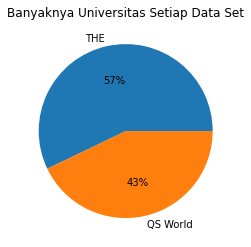

In [ ]:
n1 = df_THE.shape[0]
n2 = df_qsworld.shape[0]
x=["THE", "QS World"]
y = [n1,n2]

plt.pie(y, labels = x, autopct='%.0f%%')
plt.title("Banyaknya Universitas Setiap Data Set")
plt.show()

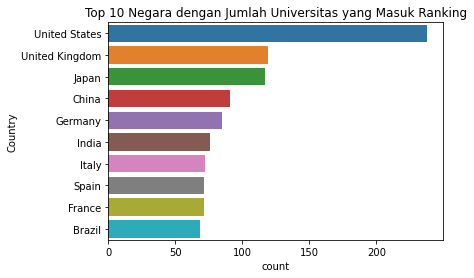

In [ ]:
sns.countplot(y ='Country', data = df_join_sorted,order = df_join_sorted["Country"].value_counts().iloc[:10].index)

plt.title("Top 10 Negara dengan Jumlah Universitas yang Masuk Ranking")
# Show the plot
plt.show()

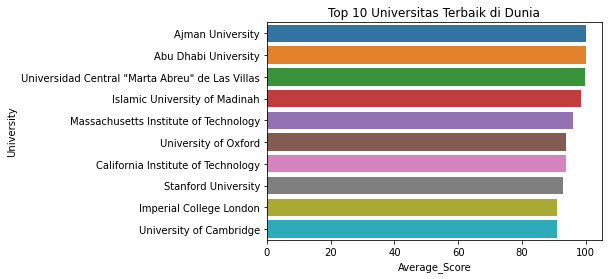

In [ ]:
sns.barplot(x=df_join_sorted["Average_Score"].iloc[:10],y =df_join_sorted['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di Dunia")
# Show the plot
plt.show()

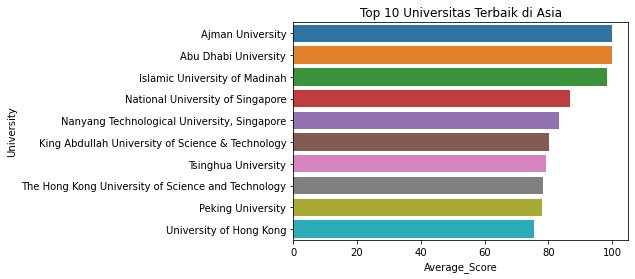

In [ ]:
df_asia = df_join_sorted[df_join_sorted.Continent=="Asia"].sort_values("Average_Score",ascending=False)

sns.barplot(x=df_asia["Average_Score"].iloc[:10],y =df_asia['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di Asia")
# Show the plot
plt.show()

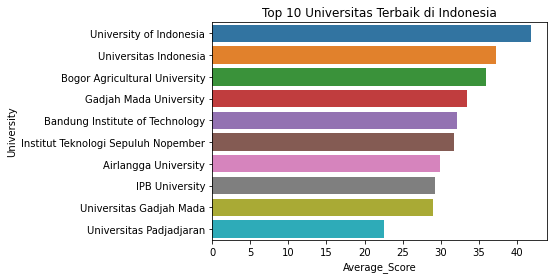

In [ ]:
df_indonesia = df_join_sorted[df_join_sorted.Country=="Indonesia"].sort_values("Average_Score",ascending=False)
sns.barplot(x=df_indonesia["Average_Score"].iloc[:10],y =df_indonesia['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di Indonesia")
# Show the plot
plt.show()

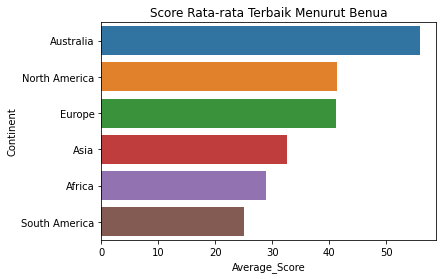

In [ ]:
df_continent_score = df_join_sorted.groupby("Continent")["Average_Score"].mean()
df_continent_score = df_continent_score.reset_index()
df_continent_score = df_continent_score.sort_values("Average_Score", ascending=False)

sns.barplot(x=df_continent_score["Average_Score"],y = df_continent_score['Continent'])


plt.title("Score Rata-rata Terbaik Menurut Benua")
# Show the plot
plt.show()

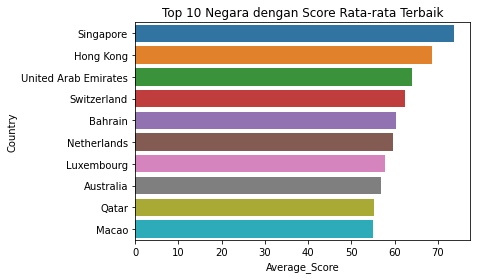

In [ ]:
df_country_score = df_join_sorted.groupby("Country")["Average_Score"].mean()
df_country_score = df_country_score.reset_index()
df_country_score = df_country_score.sort_values("Average_Score", ascending=False)

sns.barplot(x=df_country_score["Average_Score"].iloc[:10],y =df_country_score['Country'].iloc[:10])


plt.title("Top 10 Negara dengan Score Rata-rata Terbaik")
# Show the plot
plt.show()

In [ ]:
country_iso=[]
for x in df_country_score.Country :
  try:
    country_code = pc.country_name_to_country_alpha3(x, cn_name_format="default")
    country_iso.append(country_code)
  except :
    continue
df_country_score["Country_code"] = np.array(country_iso)

In [ ]:
import plotly.express as px

fig = px.choropleth(df_country_score, locations="Country_code",
                    color="Average_Score", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Score Berdasarkan Letak Negara')

fig.show()

In [ ]:
column_corr = df_join_sorted.drop(columns=["World_Rank","Continent_Rank","National_Rank"])
Corr = pd.DataFrame((abs(column_corr.corr()['Average_Score']).sort_values(ascending = False)))
Corr = Corr.reset_index()
Corr = Corr.drop(Corr[Corr.Average_Score == 1].index)
#Mengubah Nama Kolom
Corr = Corr.rename({'Average_Score': 'Correlation_Score'}, axis=1)
Corr

,index,Correlation_Score
1,Research,0.606014
2,International Faculty Ratio,0.565084
3,International Students Ratio,0.564006
4,Citations,0.515491
5,Academic Reputation,0.494720
6,Employer Reputation,0.490872
7,Teaching,0.486525
8,International Outlook,0.484971
9,Citations per Faculty,0.467391
10,Faculty Student Ratio,0.380172


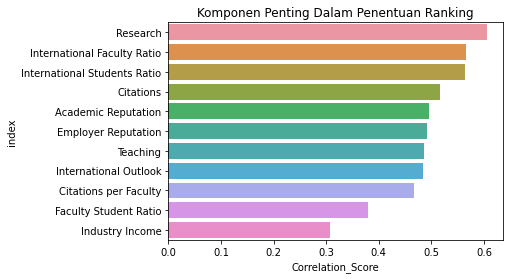

In [ ]:
sns.barplot(x=Corr["Correlation_Score"],y = Corr['index'])
plt.title("Komponen Penting Dalam Penentuan Ranking")
# Show the plot
plt.show()


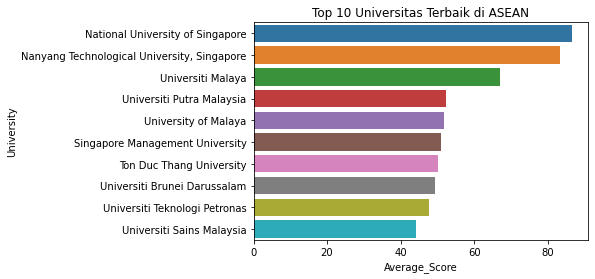

In [ ]:
asean = ['Indonesia', 'Malaysia', 'Brunei Darussalam', 'Thailand', 'Philipphines', 'Vietnam', 'Singapore']
df_asean = df_join_sorted[df_join_sorted.Country.isin(asean)]

df_asean_best = df_asean.sort_values("Average_Score",ascending=False)
sns.barplot(x=df_asean_best["Average_Score"].iloc[:10],y = df_asean['University'].iloc[:10])

plt.title("Top 10 Universitas Terbaik di ASEAN")
# Show the plot
plt.show()

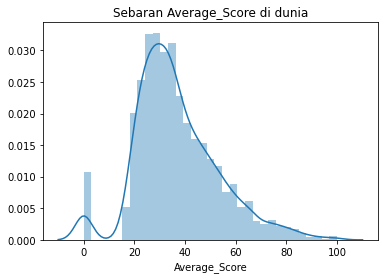

In [ ]:
sns.distplot(df_join_sorted.Average_Score)
plt.title("Sebaran Average_Score di dunia")
plt.show()

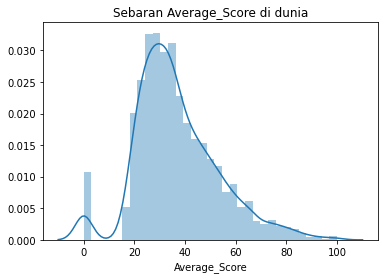

In [ ]:
sns.distplot(df_join_sorted.Average_Score)
plt.title("Sebaran Average_Score di dunia")
plt.show()